# Equation of time & Analemma
***

This notebook will calculate the equation of time (EoT) for a given location (coordinates) on Earth.
The EoT describes the discrepancy between two kinds of solar time -- the apparent solar time (diurnal mean of the Sun) and the mean solar time (theoretical mean Sun with uniform motion along the celestial equator) [__[Wikipedia: Equation of Time ](https://en.wikipedia.org/wiki/Equation_of_time#Calculation)__]

I have been able to find two different equations for the EoT from two different sources. They each serve a purpose; the first equation is a bit more more precise as it is based on precise astronomical models and uses constants such as the eccentricity and perihelion details, however the second one is a bit more simplistic and can be used for quick computations

$$EoT = -2e \sin M + y \sin \left(2M+ 2 \lambda_{\text{p}} \right) \quad [\text{Source: Wikipedia}]$$

where _M_ is the mean anomaly of the Earth's orbit, _e_ is Earth's orbital eccentricity, $\lambda$ is the perihelion longitude and _y_ is a factor that accounts for obliquity.

Given most of these are constants, we can arrive at

$$EoT = -7.659 \sin M + 9.863\sin \left(2M + 3.5932\right) \, \text{minutes.}$$

The other equation is [Source: "Astronomy on the Personal Computer" by Oliver Montenbruck and Thomas Pfleger]

$$EoT = 7.5 \sin \left( 2B \right) - 9.87\left(4B \right) - 1.914 \sin g + C$$

where

$$B = \frac{360}{365}\left(n-81\right) \left(\text{degrees}\right), \quad \text{where }n \text{ is the day of the year} \\
g \, \left(\text{mean anomaly}\right) = \frac{360}{365.24}\left(n - 81 \right) + \text{offset}$$

An analemma showing the position of the Sun in the sky as seen from a fixed location on Earth at the same mean solar time, as that position varies over the course of a year can be created by calculating the EoT for every day of the year at a given location.

***

### Comparison of the two equations

The following cells will calculate and plot the differences between the two methods and comment upon them afterwards.

In [5]:
# Necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Plotting aesthetics / tweaking
plt.rcParams['figure.figsize'] = (15, 10)
plt.rc("axes", labelsize=18)
plt.rc("xtick", labelsize=16, top=True, direction="in")
plt.rc("ytick", labelsize=16, right=True, direction="in")
plt.rc("axes", titlesize=22)
plt.rc("legend", fontsize=10)
plt.rc("figure", figsize=(10, 7))
sns.set_style("darkgrid", {'axes.grid': False})
sns.set_context("paper")
sns.set_theme(font_scale=1.4)
mycolors = ['#C188F7', '#F79288', '#7FB806', '#F59B18']
sns.set_palette("Set2")

In [10]:
# CONSTANTS
e = 0.0167  # Earth's orbital eccentricity
lambda_p = 102.9372  # Longitude of perihelion in degrees
y = 0.043  # Related to Earth's axial tilt and ellipticity
days_in_year = 365  # Self-explanatory

# Locations
locations = {"Tenerife": {"latitude": 28.1800, "longitude": -16.3035}, # Source: IAC webpage (Longitude: 16º 30´ 35" West. Latitude: 28º 18´ 00" North)
             "MtKent": {"latitude": -28.0000, "longitude": 152.0000}}  # Source: UNISQ webpage (28S, 152E)


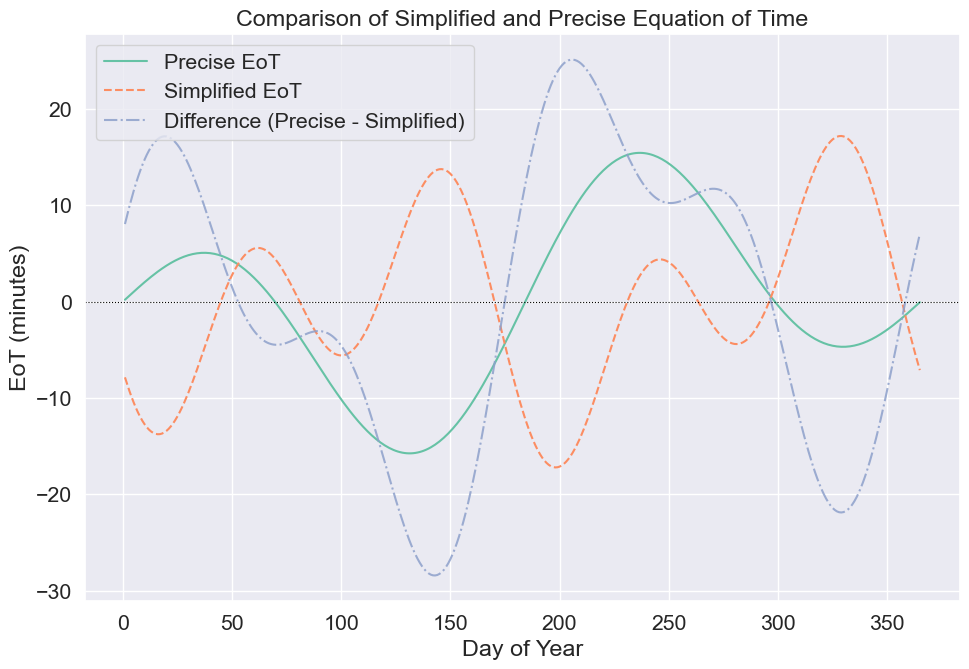

In [ ]:
def eot_precise(day_of_year):
    M = 2 * np.pi * (day_of_year - 3) / 365.24  # Note conversion between degrees in markdown text and radius here!!
    return -7.659 * np.sin(M) + 9.863 * np.sin(2 * M + np.radians(3.5932)) # Result in minutes

def eot_simplified(day_of_year):
    B = 2 * np.pi * (day_of_year - 81) / 365     # Note conversion between degrees in markdown text and radius here!!
    g = 2 * np.pi * (day_of_year - 81) / 365.24  # Note conversion between degrees in markdown text and radius here!!
    return 7.5 * np.sin(2 * B) - 9.87 * np.sin(4 * B) - 1.914 * np.sin(g) # Result in minutes

data = []
for day in range(1, days_in_year + 1):
    precise = eot_precise(day)
    simplified = eot_simplified(day)
    data.append({"Day": day, "Precise": precise, "Simplified": simplified})

# Convert to DataFrame
df = pd.DataFrame(data)
df["Difference"] = df["Precise"] - df["Simplified"]

# Plot the results
plt.plot(df["Day"], df["Precise"], label = "Precise EoT")
plt.plot(df["Day"], df["Simplified"], label = "Simplified EoT", linestyle = '--')
plt.plot(df["Day"], df["Difference"], label = "Difference (Precise - Simplified)", alpha = 0.85, linestyle = '-.')
plt.axhline(0, color = 'black', linewidth=0.8, linestyle = ':')
plt.title("Comparison of Simplified and Precise Equation of Time")
plt.xlabel("Day of Year")
plt.ylabel("EoT (minutes)")
plt.legend()
plt.tight_layout()
plt.show()

In [9]:
max_deviation = max(df["Difference"])
min_deviation = min(df["Difference"])
avg_deviation = np.mean(df["Difference"])
std = np.std(df["Difference"])

print(f"Maximum deviation: {max_deviation:.2f}")
print(f"Minimum deviation: {min_deviation:.2f}")
print(f"Average deviation: {avg_deviation:.2f}")
print(f"Standard deviation: {std:.2f}")

Maximum deviation: 25.14
Minimum deviation: -28.43
Average deviation: 0.00
Standard deviation: 14.89


From the results achieved we see clear deviations between the two methods. HOWEVER, throughout an entire year the deviations cancels out. Thus if you want to look at the EoT throughout an entire year, the method of choice does not matter, but when only looking at a given window period, the chosen method plays an important role.